In [264]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [265]:
data = pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [266]:
data.shape

(1338, 7)

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [268]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Analysis data

<Axes: xlabel='age', ylabel='Density'>

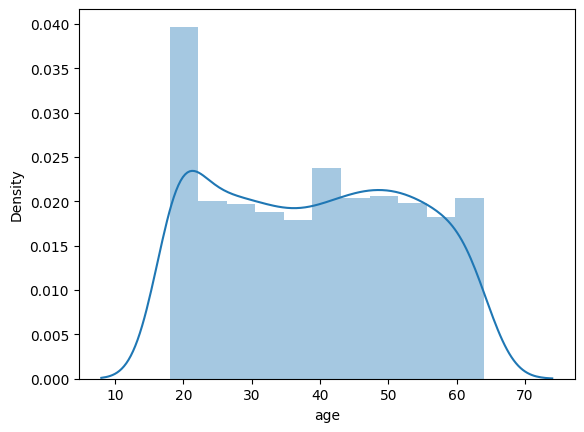

In [269]:
# distribution for age
sns.distplot(data['age'])

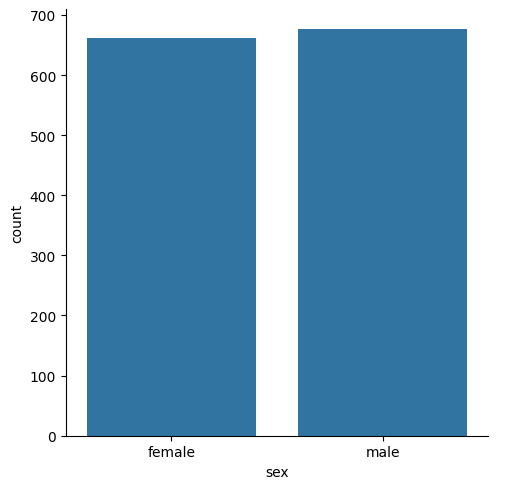

In [270]:
sns.catplot(x='sex', data=data, kind='count')

<Axes: xlabel='bmi', ylabel='Density'>

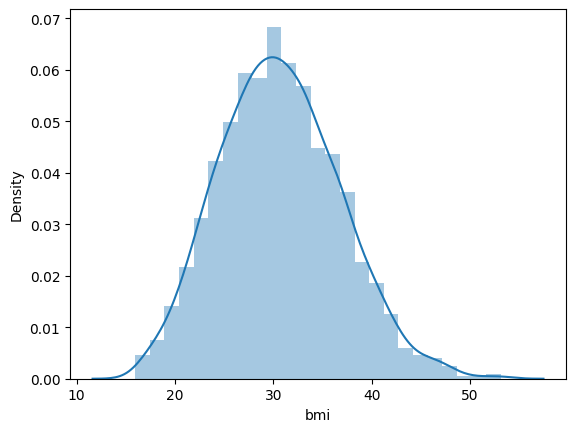

In [271]:
sns.distplot(data['bmi'])

<Axes: xlabel='children', ylabel='count'>

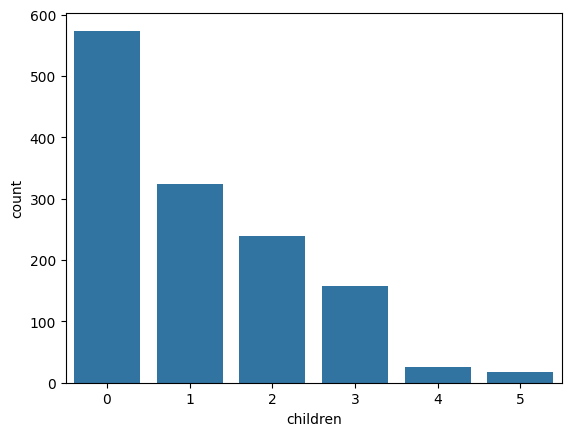

In [272]:
sns.countplot(x='children', data = data)

In [273]:
data['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


<Axes: xlabel='smoker', ylabel='count'>

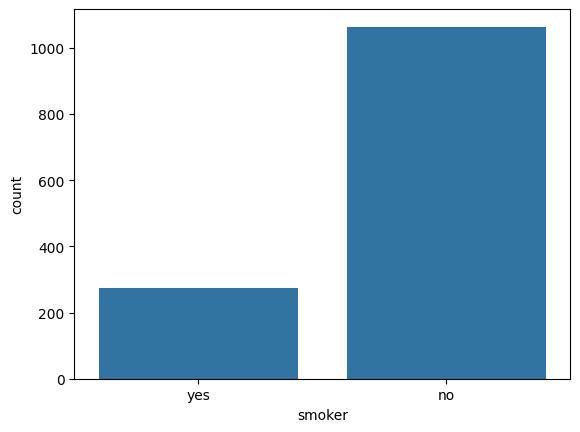

In [274]:
sns.countplot(x='smoker', data = data)

In [275]:
data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


<Axes: xlabel='region', ylabel='count'>

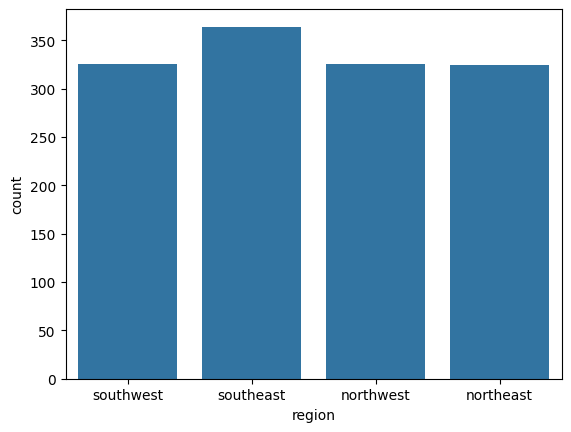

In [276]:
sns.countplot(x='region', data = data)

In [277]:
data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


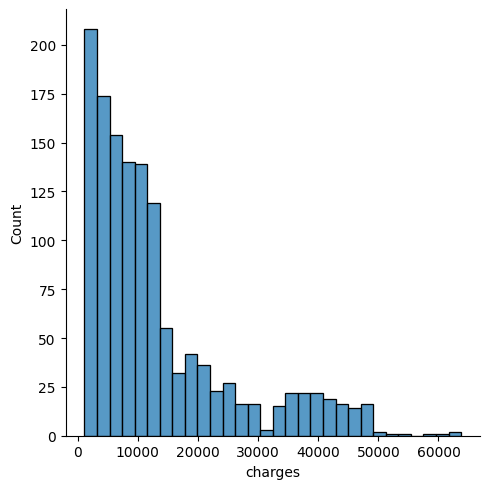

In [278]:
sns.displot(data['charges'])

Data Pre_processing

In [279]:
# encoding sex column
data.replace({'sex':{'male':0, 'female':1}}, inplace = True)

# encoding smoker column
data.replace({'smoker':{'no':0, 'yes':1}}, inplace = True)

# encoding region column
data.replace({'region':{'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast':3}}, inplace=True)


In [280]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 0)
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [281]:
Y_pred = model.predict(X_test)
r2_score = metrics.r2_score(Y_test, Y_pred)
r2_score

0.799796841255606

In [282]:
train_predict = model.predict(X_train)
r2_score_train = metrics.r2_score(Y_train, train_predict)
r2_score_train

0.7369902703793605

Predictive system

In [283]:
input_data = (31,1,25.74,0,0,0)

#change to numpy array
input_data_as_array = np.asarray(input_data)

# reshape the array
reshaped_data = input_data_as_array.reshape(1,-1)

prediction = model.predict(reshaped_data)
prediction

array([3712.32328245])